<a href="https://colab.research.google.com/github/KaustubhVaidya404/herbclassifier/blob/main/herbclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflowjs

In [2]:
import tensorflow as tf
import tensorflowjs as tfjs
import os
import keras
from keras import layers

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [5]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

indian-medicinal-leaves-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip '/content/indian-medicinal-leaves-dataset.zip'

Archive:  /content/indian-medicinal-leaves-dataset.zip
replace Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset/Aloevera/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
batch_size = 64
img_height = 244
img_width = 244

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6900 files belonging to 80 classes.
Using 5520 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6900 files belonging to 80 classes.
Using 1380 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

file = open('labels.txt', 'w')

for val in class_names:
  file.write(val+'\n')

file.close()

['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


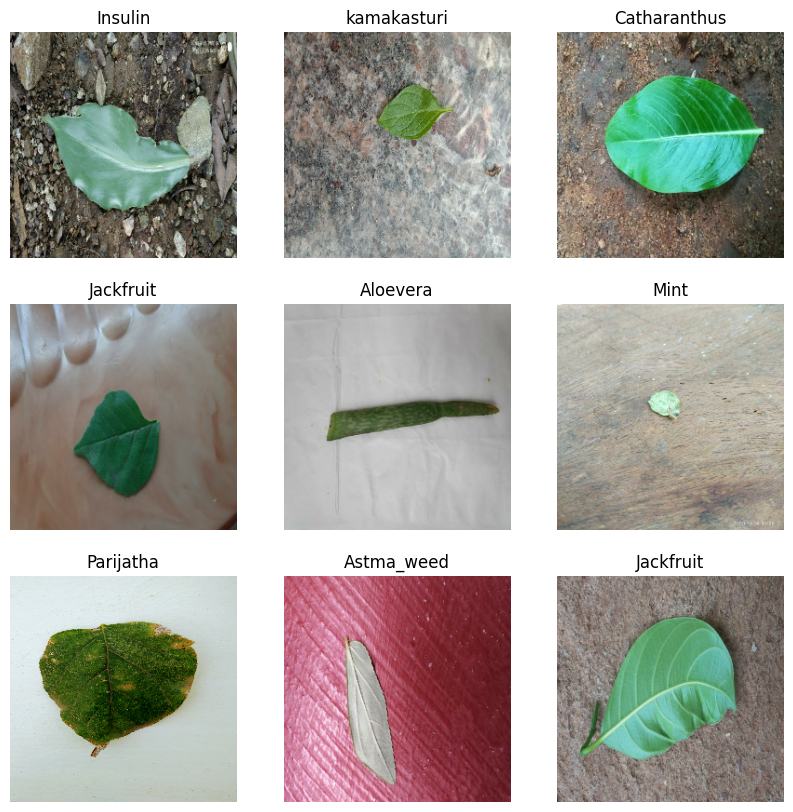

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 244, 244, 3)
(64,)


In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.Rescaling(1./255)

In [15]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 244, 244, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        1

In [18]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
87/87 [==============================] - 268s 1s/step - loss: 4.2061 - accuracy: 0.0476 - val_loss: 3.9113 - val_accuracy: 0.0913
Epoch 2/100
87/87 [==============================] - 6s 71ms/step - loss: 3.5707 - accuracy: 0.1502 - val_loss: 3.2092 - val_accuracy: 0.2355
Epoch 3/100
87/87 [==============================] - 6s 69ms/step - loss: 2.6463 - accuracy: 0.3484 - val_loss: 2.7419 - val_accuracy: 0.3174
Epoch 4/100
87/87 [==============================] - 6s 71ms/step - loss: 1.8321 - accuracy: 0.5266 - val_loss: 2.3358 - val_accuracy: 0.4159
Epoch 5/100
87/87 [==============================] - 6s 69ms/step - loss: 1.1458 - accuracy: 0.6933 - val_loss: 2.3988 - val_accuracy: 0.4638
Epoch 6/100
87/87 [==============================] - 6s 72ms/step - loss: 0.6936 - accuracy: 0.8118 - val_loss: 2.4793 - val_accuracy: 0.4761
Epoch 7/100
87/87 [==============================] - 6s 69ms/step - loss: 0.3483 - accuracy: 0.9024 - val_loss: 2.7279 - val_accuracy: 0.4848
Epoch 

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [20]:
tfjs.converters.save_keras_model(model, 'models')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
TF_MODEL_FILE_PATH = 'model.tflite'

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [22]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_1_input'], 'outputs': ['dense_1']}}

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

uploaded_files = files.upload()

for path in uploaded_files.keys():
  input_image = image.load_img(path, target_size = (244, 244))
  image_values = image.img_to_array(input_image)
  dimension_corrected = np.expand_dims(image_values, axis = 0)
  prediction = model.predict(dimension_corrected)
  argmax_value = np.argmax(prediction)
  print(argmax_value)
  print(class_names[argmax_value])

Saving tulsi.jpg to tulsi (1).jpg
1/1 [==============================] - 0s 309ms/step
74
Tulsi
